<a href="https://colab.research.google.com/github/MIKBRUNO/TPNS/blob/main/lab3/custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [2]:
import matplotlib.pyplot as plt

# DATASET

In [34]:
steel_industry_energy_consumption = fetch_ucirepo(id=851)

X = steel_industry_energy_consumption.data.features
y = steel_industry_energy_consumption.data.targets

In [35]:
X

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week
0,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday
1,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday
2,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday
3,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday
4,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday
...,...,...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  object 
 8   Day_of_week                           35040 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 2.4+ MB


In [6]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Load_Type  35040 non-null  object
dtypes: object(1)
memory usage: 273.9+ KB


In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import MAE, categorical_accuracy

In [38]:
data = pd.concat([X, y], axis=1)

In [39]:
label_encoder_weekstatus = LabelEncoder()
data['WeekStatus'] = label_encoder_weekstatus.fit_transform(data['WeekStatus'])

label_encoder_dayofweek = LabelEncoder()
data['Day_of_week'] = label_encoder_dayofweek.fit_transform(data['Day_of_week'])

label_encoder_loadtype = LabelEncoder()
data['Load_Type'] = label_encoder_loadtype.fit_transform(data['Load_Type'])

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Usage_kWh                             35040 non-null  float64
 1   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 3   CO2(tCO2)                             35040 non-null  float64
 4   Lagging_Current_Power_Factor          35040 non-null  float64
 5   Leading_Current_Power_Factor          35040 non-null  float64
 6   NSM                                   35040 non-null  int64  
 7   WeekStatus                            35040 non-null  int64  
 8   Day_of_week                           35040 non-null  int64  
 9   Load_Type                             35040 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 2.7 MB


In [41]:
scaler = StandardScaler()
data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
      'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']] \
= scaler.fit_transform(
    data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh',
          'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']])

In [42]:
data

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,-0.724105,-0.618516,-0.521385,-0.71355,-0.389410,0.513268,-1.678015,0,1,0
1,-0.699287,-0.525911,-0.521385,-0.71355,-0.729772,0.513268,-1.641929,0,1,0
2,-0.722012,-0.598278,-0.521385,-0.71355,-0.544264,0.513268,-1.605843,0,1,0
3,-0.719919,-0.581106,-0.521385,-0.71355,-0.660009,0.513268,-1.569756,0,1,0
4,-0.704669,-0.523458,-0.521385,-0.71355,-0.838117,0.513268,-1.533670,0,1,0
...,...,...,...,...,...,...,...,...,...,...
35035,-0.703772,-0.501380,-0.521385,-0.71355,-0.976587,0.513268,1.605843,0,1,0
35036,-0.707061,-0.570067,-0.521385,-0.71355,-0.521538,0.513268,1.641929,0,1,0
35037,-0.705865,-0.605024,-0.511957,-0.71355,-0.209188,0.512611,1.678015,0,1,0
35038,-0.705865,-0.611770,-0.506569,-0.71355,-0.151052,0.511954,1.714102,0,1,0


In [43]:
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data.iloc[i:(i + time_steps)].values)
        y.append(target.iloc[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 5
X, y = create_sequences(data.drop('Load_Type', axis=1), data['Load_Type'], time_steps)

In [44]:
X.shape

(35035, 5, 9)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], 1))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], 1))

In [46]:
y_train.shape

(28028, 3, 1)

# COMMONS


In [53]:
from copy import deepcopy

import numpy as np
from numpy.typing import ArrayLike


def relu(x: ArrayLike) -> ArrayLike:
    return np.max(np.array([np.zeros(x.shape, dtype=x.dtype), x]), axis=0)


d_relu = np.vectorize(lambda x: 0 if x < 0 else 1)


def tanh(x: ArrayLike) -> ArrayLike:
    return np.tanh(x)


def d_tanh(x: ArrayLike) -> ArrayLike:
    return 1 - tanh(x) ** 2


def sigmoid(x: ArrayLike) -> ArrayLike:
    return np.tanh(x * 0.5) * 0.5 + 0.5


def d_sigmoid(x: ArrayLike) -> ArrayLike:
    sig = sigmoid(x)
    return x * (1 - x)

def none(x):
    return x


def d_none(x):
    return np.ones(x.shape)


name_to_functions = {
    'relu': (relu, d_relu),
    'tanh': (tanh, d_tanh),
    'none': (none, d_none),
    '': (None, None)
}

In [54]:
class Layer:
    def __init__(self, activation: str, input_shape=None):
        self._input_size: int = input_shape
        self._activation_function, self._d_activation_function = name_to_functions[activation]

    def get_input_shape(self):
        return self._input_size

    def get_output_shape(self):
        pass

    def set_input_size(self, input_size: int):
        self._input_size = input_size

    def forward(self, x):
        pass

    def backward(self, e, learning_rate: float):
        pass

    def init(self):
        pass

In [55]:
def softmax(x: ArrayLike) -> ArrayLike:
    x = x - np.max(x)
    exp_array = np.exp(x)
    return exp_array / np.sum(exp_array)


class NeuralNetwork:
    def __init__(self):
        self._layers: list[Layer] = []

    def add_layer(self, layer: Layer):
        if len(self._layers) != 0:
            layer.set_input_size(self._layers[-1].get_output_shape())
        self._layers.append(layer)

    def fit(self, x, y, learning_rate: float):
        z = self.predict(x)
        e = z - y
        error = np.sum(np.abs(e))
        for i in range(len(self._layers)):
            e = self._layers[-1 - i].backward(e, learning_rate)
        return error

    def predict(self, x):
        for layer in self._layers:
            x = layer.forward(x)
        return softmax(x)

    def init(self):
        for layer in self._layers:
            layer.init()

In [56]:
class DenseLayer(Layer):
    def __init__(self, neurons_count: int, activation: str = 'none', input_size=None):
        super().__init__(activation, input_shape=input_size)
        self._neurons_count = neurons_count
        self._weight_matrix = np.empty(0)
        self._shift = np.empty(0)
        self._sum = np.empty(0)
        self._x = np.empty(0)

    def get_output_shape(self):
        return self._neurons_count

    def forward(self, x):
        self._x = x
        self._sum = np.matmul(self._weight_matrix, x) + self._shift
        return self._activation_function(self._sum)

    def backward(self, e, learning_rate: float):
        d_sum = e * self._d_activation_function(self._sum)
        d_matrix = np.matmul(d_sum, self._x.T)

        self._weight_matrix -= learning_rate * d_matrix
        self._shift -= learning_rate * d_sum

        return np.matmul(self._weight_matrix.T, d_sum)

    def init(self):
        self._weight_matrix = np.random.random((self.get_output_shape(), self._input_size)) * 2 - 1
        self._shift = np.random.random((self.get_output_shape(), 1)) * 2 - 1

# RNN

In [21]:
class RNN(Layer):
    def __init__(self, output_size: int, activation: str = 'none', input_size=None, return_sequence=False):
        super().__init__(activation, input_shape=input_size)
        self._hidden_size = 0
        self._output_size = output_size
        self._return_sequence = return_sequence
        self._sequence_length = 0

        self._x = np.empty(0)
        self._input_weights = np.empty(0)
        self._hidden_weights = np.empty(0)
        self._output_weights = np.empty(0)
        self._hidden_bias = np.empty(0)
        self._output_bias = np.empty(0)
        self._hidden_state = np.empty(0)

    def get_output_shape(self):
        return self._output_size

    def forward(self, x):
        self._x = x
        self._sequence_length = x.shape[0]

        hidden = np.zeros((self._hidden_size, 1))
        self._hidden_state = np.zeros((self._sequence_length, self._hidden_size, 1))

        for i in range(self._sequence_length):
            input_x = np.matmul(self._input_weights, x[i]).reshape(self._input_weights.shape[0], 1)
            hidden = input_x + np.matmul(self._hidden_weights, hidden) + self._hidden_bias
            hidden = self._activation_function(hidden)
            self._hidden_state[i] = hidden

        if self._return_sequence:
            output = np.matmul(self._output_weights, self._hidden_state) + self._output_bias
        else:
            final_hidden_state = self._hidden_state[-1]
            output = np.matmul(self._output_weights, final_hidden_state) + self._output_bias

        return output

    def backward(self, e, learning_rate: float):
        d_input_weights = np.zeros_like(self._input_weights)
        d_hidden_weights = np.zeros_like(self._hidden_weights)
        d_output_weights = np.zeros_like(self._output_weights)
        d_output_bias = np.zeros_like(self._output_bias)
        d_hidden_bias = np.zeros_like(self._hidden_bias)
        d_x = np.zeros_like(self._x)
        if len(d_x.shape) == 2:
            d_x = d_x[:, :, np.newaxis]

        hidden_error_gradient = np.zeros((self._hidden_size, 1))

        for i in reversed(range(self._sequence_length)):
            hidden_i = self._hidden_state[i]

            if self._return_sequence:
                l_grad_i = e[i]
                d_output_weights += np.matmul(l_grad_i, hidden_i.T)
                d_output_bias += l_grad_i

                hidden_error = np.matmul(self._output_weights.T, l_grad_i) + hidden_error_gradient
            else:
                if i == self._sequence_length - 1:
                    d_output_weights += np.matmul(e, hidden_i.T)
                    d_output_bias += e

                    hidden_error = np.matmul(self._output_weights.T, e)
                else:
                    hidden_error = hidden_error_gradient

            hidden_derivative = self._d_activation_function(hidden_i)
            h_grad_i = hidden_derivative * hidden_error

            if i > 0:
                d_hidden_weights += np.matmul(h_grad_i, self._hidden_state[i - 1].T)
                d_hidden_bias += h_grad_i

            input_x = self._x[i].reshape(self._x[i].shape[0], 1)
            d_input_weights += np.matmul(h_grad_i, input_x.T)

            hidden_error_gradient = np.matmul(self._hidden_weights.T, h_grad_i)

            d_x[i] = np.matmul(self._input_weights.T, h_grad_i)

            self._input_weights -= learning_rate * d_input_weights
            self._hidden_weights -= learning_rate * d_hidden_weights
            self._output_weights -= learning_rate * d_output_weights
            self._hidden_bias -= learning_rate * d_hidden_bias
            self._output_bias -= learning_rate * d_output_bias

            return d_x

    def init(self):
        self._hidden_size = self._input_size
        self._input_weights = np.random.random((self._hidden_size, self._input_size)) * 2 - 1
        self._hidden_weights = np.random.random((self._hidden_size, self._hidden_size)) * 2 - 1
        self._output_weights = np.random.random((self._output_size, self._hidden_size)) * 2 - 1

        self._hidden_bias = np.zeros((self._hidden_size, 1))
        self._output_bias = np.zeros((self._output_size, 1))

In [22]:
model = NeuralNetwork()
model.add_layer(RNN(output_size=24, activation='tanh', input_size=9, return_sequence=True))
model.add_layer(RNN(output_size=10, activation='tanh', input_size=9))
model.add_layer(DenseLayer(neurons_count=3, activation='none'))

model.init()

In [26]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

for epoch in range(20):
    mean_loss = 0
    mean_accuracy = 0
    train_size = len(X_train)
    for i in range(train_size):
        loss = model.fit(X_train[i], y_train[i], 0.0001)
        mean_loss += loss
        accuracy = categorical_accuracy(y_train[i].reshape((3,)), model.predict(X_train[i]).reshape((3,)))
        mean_accuracy += accuracy
    mean_loss /= train_size
    mean_accuracy /= train_size
    train_loss.append(mean_loss)
    train_accuracy.append(mean_accuracy)
    print(f"Epoch {epoch} complete. train_loss: {mean_loss}, train_accuracy: {mean_accuracy}")

    test_size = len(X_test)
    mean_loss = 0
    mean_accuracy = 0
    for i in range(test_size):
        y_pred = model.predict(X_test[i])
        loss = np.sum(np.abs(y_test[i] - y_pred))
        accuracy = categorical_accuracy(y_test[i].reshape((3,)), y_pred.reshape((3,)))
        mean_loss += loss
        mean_accuracy += accuracy
    mean_loss /= test_size
    mean_accuracy /= test_size
    test_loss.append(mean_loss)
    test_accuracy.append(mean_accuracy)
    print(f"test_loss: {mean_loss}, test_accuracy: {mean_accuracy}")

Epoch 0 complete. train_loss: 0.7124918250348766, train_accuracy: 0.6747663021087646
test_loss: 0.6669905361755831, test_accuracy: 0.6997288465499878
Epoch 1 complete. train_loss: 0.620789873444574, train_accuracy: 0.7495182752609253
test_loss: 0.6207213003803249, test_accuracy: 0.757242739200592
Epoch 2 complete. train_loss: 0.5887689471636413, train_accuracy: 0.7751016616821289
test_loss: 0.6029290015359462, test_accuracy: 0.7643784880638123
Epoch 3 complete. train_loss: 0.5786017902664053, train_accuracy: 0.7798116207122803
test_loss: 0.5810196990430253, test_accuracy: 0.776651918888092
Epoch 4 complete. train_loss: 0.5504427873694655, train_accuracy: 0.8010419011116028
test_loss: 0.5578934350921593, test_accuracy: 0.7903525233268738
Epoch 5 complete. train_loss: 0.5321501927222235, train_accuracy: 0.806715190410614
test_loss: 0.542099426009221, test_accuracy: 0.796061098575592
Epoch 6 complete. train_loss: 0.5224744435465083, train_accuracy: 0.8089987635612488
test_loss: 0.53664584

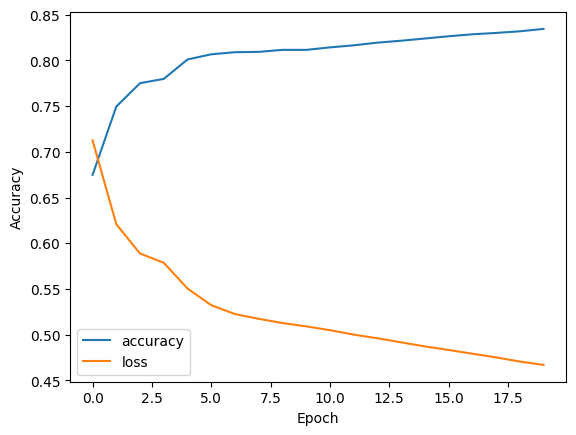

In [27]:
plt.plot(train_accuracy, label='accuracy')
plt.plot(train_loss, label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

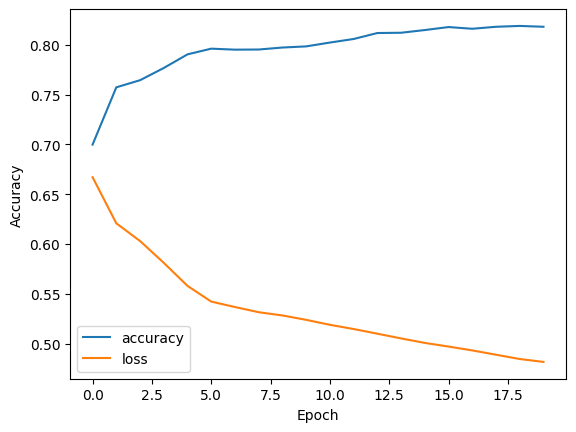

In [28]:
plt.plot(test_accuracy, label='accuracy')
plt.plot(test_loss, label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# GRU

In [57]:
class GRU(Layer):
    def __init__(self, output_size: int, activation: str = 'none', input_size=None, return_sequence=False):
        super().__init__(activation, input_shape=input_size)
        self._hidden_size = 0
        self._output_size = output_size
        self._return_sequence = return_sequence
        self._sequence_length = 0

        self.Wz = np.empty(0)
        self.Uz = np.empty(0)
        self.bz = np.empty(0)

        self.Wr = np.empty(0)
        self.Ur = np.empty(0)
        self.br = np.empty(0)

        self.Wh = np.empty(0)
        self.Uh = np.empty(0)
        self.bh = np.empty(0)

        self.Wy = np.empty(0)
        self.by = np.empty(0)

        self.x = np.empty(0)
        self.z = np.empty(0)
        self.r = np.empty(0)
        self.h = np.empty(0)
        self.h_hat = np.empty(0)

    def get_output_shape(self):
        return self._output_size

    def forward(self, x):
        self._sequence_length = x.shape[0]
        self.x = x

        z = np.zeros((self._sequence_length, self._hidden_size, 1))
        r = np.zeros((self._sequence_length, self._hidden_size, 1))
        h = np.zeros((self._sequence_length, self._hidden_size, 1))
        h_hat = np.zeros((self._sequence_length, self._hidden_size, 1))

        if len(x.shape) == 2:
            x = x[:, :, np.newaxis]

        for k in range(self._sequence_length):

            if k > 0:
                prev_h = h[k - 1]
            else:
                prev_h = np.zeros_like(h[0])

            z[k] = sigmoid(
                np.matmul(self.Wz, x[k]) +
                np.matmul(self.Uz, prev_h) +
                self.bz
            )

            r[k] = sigmoid(
                np.matmul(self.Wr, x[k]) +
                np.matmul(self.Ur, prev_h) +
                self.br
            )

            h_hat[k] = self._activation_function(
                np.matmul(self.Wh, x[k]) +
                np.matmul(self.Uh, prev_h) +
                self.bh
            )

            h[k] = z[k] * prev_h + (1 - z[k]) * h_hat[k]

        self.z = z
        self.r = r
        self.h = h
        self.h_hat = h_hat

        if self._return_sequence:
            return np.matmul(self.Wy, self.h) + self.by
        else:
            return np.matmul(self.Wy, self.h[-1]) + self.by

    def backward(self, e, learning_rate: float):
        dWz, dUz, dbz = np.zeros_like(self.Wz), np.zeros_like(self.Uz), np.zeros_like(self.bz)
        dWr, dUr, dbr = np.zeros_like(self.Wr), np.zeros_like(self.Ur), np.zeros_like(self.br)
        dWh, dUh, dbh = np.zeros_like(self.Wh), np.zeros_like(self.Uh), np.zeros_like(self.bh)
        dWy, dby = np.zeros_like(self.Wy), np.zeros_like(self.by)

        dh_next = np.zeros((self._hidden_size, 1))

        dX = np.zeros((self._sequence_length, self._input_size, 1))
        if len(self.x.shape) == 2:
            self.x = self.x[:, :, np.newaxis]

        for k in reversed(range(self._sequence_length)):
            if self._return_sequence:
                dy = e[k]
            else:
                if k == self._sequence_length - 1:
                    dy = e
                else:
                    dy = np.zeros_like(e)

            dWy += np.matmul(dy, self.h[k].T)
            dby += dy

            dh = np.matmul(self.Wy.T, dy) + dh_next
            dh_hat = dh * (1 - self.z[k])
            dh_hat_l = dh_hat * self._d_activation_function(self.h_hat[k])

            dWh += np.matmul(dh_hat_l, self.x[k].T)
            dUh += np.matmul(dh_hat_l, (self.r[k] * self.h[k - 1]).T)
            dbh += dh_hat_l

            drhp = np.matmul(self.Uh.T, dh_hat_l)
            dr = drhp * self.h[k - 1]
            dr_l = dr * self._d_activation_function(self.r[k])

            dWr += np.matmul(dr_l, self.x[k].T)
            dUr += np.matmul(dr_l, self.h[k - 1].T)
            dbr += dr_l

            dz = dh * (self.h[k - 1] - self.h_hat[k])
            dz_l = dz * self._d_activation_function(self.z[k])

            dWz += np.matmul(dz_l, self.x[k].T)
            dUz += np.matmul(dz_l, self.h[k - 1].T)
            dbz += dz_l

            dh_fz_inner = np.matmul(self.Uz.T, dz_l)
            dh_fz = dh * self.z[k]
            dh_fhh = drhp * self.r[k]
            dh_fr = np.matmul(self.Ur.T, dr_l)

            dh_next = dh_fz_inner + dh_fz + dh_fhh + dh_fr

            dX[k] = (np.matmul(self.Wz.T, dz_l) +
                     np.matmul(self.Wr.T, dr_l) +
                     np.matmul(self.Wh.T, dh_hat_l))

        self.Wz -= learning_rate * dWz
        self.Uz -= learning_rate * dUz
        self.bz -= learning_rate * dbz
        self.Wr -= learning_rate * dWr
        self.Ur -= learning_rate * dUr
        self.br -= learning_rate * dbr
        self.Wh -= learning_rate * dWh
        self.Uh -= learning_rate * dUh
        self.bh -= learning_rate * dbh
        self.Wy -= learning_rate * dWy
        self.by -= learning_rate * dby

        return dX

    def init(self):
        self._hidden_size = self._input_size

        self.Wz = np.random.random((self._hidden_size, self._input_size)) - 0.5
        self.Uz = np.random.random((self._hidden_size, self._hidden_size)) - 0.5
        self.bz = np.zeros((self._hidden_size, 1))

        self.Wr = np.random.random((self._hidden_size, self._input_size)) - 0.5
        self.Ur = np.random.random((self._hidden_size, self._hidden_size)) - 0.5
        self.br = np.zeros((self._hidden_size, 1))

        self.Wh = np.random.random((self._hidden_size, self._input_size)) - 0.5
        self.Uh = np.random.random((self._hidden_size, self._hidden_size)) - 0.5
        self.bh = np.zeros((self._hidden_size, 1))

        self.Wy = np.random.random((self._output_size, self._hidden_size)) - 0.5
        self.by = np.zeros((self._output_size, 1))

In [60]:
model = NeuralNetwork()
model.add_layer(GRU(output_size=24, activation='tanh', input_size=9))
# model.add_layer(GRU(output_size=10, activation='tanh', input_size=9))
model.add_layer(DenseLayer(neurons_count=10, activation='tanh'))
model.add_layer(DenseLayer(neurons_count=3, activation='none'))

model.init()

In [61]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

for epoch in range(10):
    mean_loss = 0
    mean_accuracy = 0
    train_size = len(X_train)
    for i in range(train_size):
        loss = model.fit(X_train[i], y_train[i], 0.0001)
        mean_loss += loss
        accuracy = categorical_accuracy(y_train[i].reshape((3,)), model.predict(X_train[i]).reshape((3,)))
        mean_accuracy += accuracy
    mean_loss /= train_size
    mean_accuracy /= train_size
    train_loss.append(mean_loss)
    train_accuracy.append(mean_accuracy)
    print(f"Epoch {epoch} complete. train_loss: {mean_loss}, train_accuracy: {mean_accuracy}")

    test_size = len(X_test)
    mean_loss = 0
    mean_accuracy = 0
    for i in range(test_size):
        y_pred = model.predict(X_test[i])
        loss = np.sum(np.abs(y_test[i] - y_pred))
        accuracy = categorical_accuracy(y_test[i].reshape((3,)), y_pred.reshape((3,)))
        mean_loss += loss
        mean_accuracy += accuracy
    mean_loss /= test_size
    mean_accuracy /= test_size
    test_loss.append(mean_loss)
    test_accuracy.append(mean_accuracy)
    print(f"test_loss: {mean_loss}, test_accuracy: {mean_accuracy}")

Epoch 0 complete. train_loss: 0.8103570711826195, train_accuracy: 0.7000142931938171
test_loss: 0.6746691744149729, test_accuracy: 0.7522477507591248
Epoch 1 complete. train_loss: 0.6285666848805713, train_accuracy: 0.7732981443405151
test_loss: 0.6136989445759949, test_accuracy: 0.7786499261856079
Epoch 2 complete. train_loss: 0.5852877181015241, train_accuracy: 0.7959897518157959
test_loss: 0.5805800410630533, test_accuracy: 0.7953475117683411
Epoch 3 complete. train_loss: 0.5584960026745961, train_accuracy: 0.8083701729774475
test_loss: 0.5565181713883758, test_accuracy: 0.8054802417755127
Epoch 4 complete. train_loss: 0.5398664208353559, train_accuracy: 0.8167189955711365
test_loss: 0.5390057651393578, test_accuracy: 0.8117596507072449
Epoch 5 complete. train_loss: 0.525930790420495, train_accuracy: 0.8218210339546204
test_loss: 0.5251053932688325, test_accuracy: 0.8184672594070435
Epoch 6 complete. train_loss: 0.514206093076819, train_accuracy: 0.826780378818512
test_loss: 0.51302

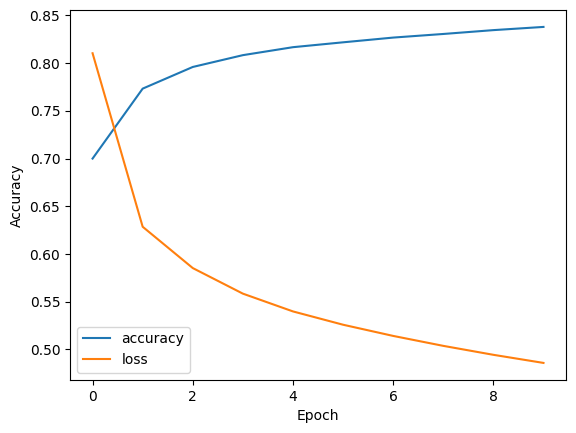

In [62]:
plt.plot(train_accuracy, label='accuracy')
plt.plot(train_loss, label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

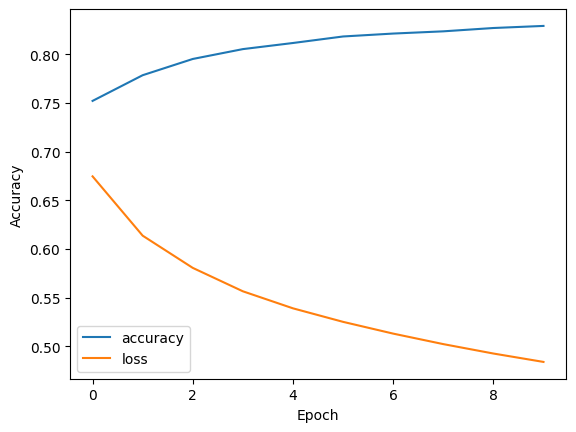

In [63]:
plt.plot(test_accuracy, label='accuracy')
plt.plot(test_loss, label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# LSTM

In [25]:
class LSTM(Layer):
    def __init__(self, output_size: int, activation: str = 'none', input_size=None, return_sequence=False):
        super().__init__(activation, input_shape=input_size)
        self._hidden_size = 0
        self._output_size = output_size
        self._return_sequence = return_sequence
        self._sequence_length = 0

        self.Wi = np.empty(0)
        self.Ui = np.empty(0)
        self.bi = np.empty(0)

        self.Wf = np.empty(0)
        self.Uf = np.empty(0)
        self.bf = np.empty(0)

        self.Wo = np.empty(0)
        self.Uo = np.empty(0)
        self.bo = np.empty(0)

        self.Wc = np.empty(0)
        self.Uc = np.empty(0)
        self.bc = np.empty(0)

        self.Wy = np.empty(0)
        self.by = np.empty(0)

        self.x = np.empty(0)
        self.hs = np.empty(0)
        self.cs = np.empty(0)
        self.os = np.empty(0)
        self.fs = np.empty(0)
        self.ins = np.empty(0)
        self._cs = np.empty(0)
        self.c_tanh = np.empty(0)

    def get_output_shape(self):
        return self._output_size

    def forward(self, x):
        self._sequence_length = x.shape[0]
        self.x = x

        h_k = np.zeros((self._hidden_size, 1))
        c_k = np.zeros((self._hidden_size, 1))

        self.hs = np.zeros((self._sequence_length, self._hidden_size, 1))
        self.cs = np.zeros((self._sequence_length, self._hidden_size, 1))
        self.ins = np.zeros((self._sequence_length, self._hidden_size, 1))
        self.os = np.zeros((self._sequence_length, self._hidden_size, 1))
        self.fs = np.zeros((self._sequence_length, self._hidden_size, 1))
        self._cs = np.zeros((self._sequence_length, self._hidden_size, 1))
        self.c_tanh = np.zeros((self._sequence_length, self._hidden_size, 1))

        for k in range(self._sequence_length):
            x_k = x[k]
            if len(x_k.shape) == 1:
                x_k = x_k[:, np.newaxis]
            ik = sigmoid(
                np.matmul(self.Wi, x_k) +
                np.matmul(self.Ui, h_k) +
                self.bi
            )
            fk = sigmoid(
                np.matmul(self.Wf, x_k) +
                np.matmul(self.Uf, h_k) +
                self.bf
            )
            ok = sigmoid(
                np.matmul(self.Wo, x_k) +
                np.matmul(self.Uo, h_k) +
                self.bo
            )

            c = self._activation_function(
                np.matmul(self.Wc, x_k) +
                np.matmul(self.Uc, h_k) +
                self.bc
            )

            self.ins[k] = ik
            self.os[k] = ok
            self.fs[k] = fk
            self._cs[k] = c

            ck = fk * c_k + ik * c
            self.cs[k] = ck

            self.c_tanh[k] = self._activation_function(ck)
            ht = ok * self.c_tanh[k]
            self.hs[k] = ht

        if self._return_sequence:
            output = (np.matmul(self.Wy, self.hs.T) + self.by).T
        else:
            final_hidden_state = self.hs[-1].reshape(self.hs[-1].shape[0], 1)
            output = np.matmul(self.Wy, final_hidden_state) + self.by

        return output

    def backward(self, e, learning_rate: float):
        dWi, dUi, dbi = np.zeros_like(self.Wi), np.zeros_like(self.Ui), np.zeros_like(self.bi)
        dWf, dUf, dbf = np.zeros_like(self.Wf), np.zeros_like(self.Uf), np.zeros_like(self.bf)
        dWo, dUo, dbo = np.zeros_like(self.Wo), np.zeros_like(self.Uo), np.zeros_like(self.bo)
        dWc, dUc, dbc = np.zeros_like(self.Wc), np.zeros_like(self.Uc), np.zeros_like(self.bc)
        dWy, dby = np.zeros_like(self.Wy), np.zeros_like(self.by)

        dh_next = np.zeros((self._hidden_size, 1))
        dc_next = np.zeros((self._hidden_size, 1))

        dX = np.zeros((self._sequence_length, self._input_size, 1))

        for k in reversed(range(self._sequence_length)):
            if self._return_sequence:
                dy = e[k]
            else:
                if k == self._sequence_length - 1:
                    dy = e
                else:
                    dy = np.zeros_like(e)

            dWy += np.matmul(dy, self.hs[k].T)
            dby += dy
            dh = np.matmul(self.Wy.T, dy) + dh_next
            dc = (self.os[k] * dh *
                  self._d_activation_function(self.cs[k]) + dc_next)
            dot = d_sigmoid(self.os[k]) * self.c_tanh[k] * dh

            if k > 0:
                dft = self.cs[k - 1] * dc * d_sigmoid(self.fs[k])
            else:
                dft = np.zeros_like(self.fs[k])

            dit = self._cs[k] * dc * d_sigmoid(self.ins[k])
            dct = self.ins[k] * dc * self._d_activation_function(self._cs[k])
            dWi += np.matmul(self.x[k].T, dit)
            dbi += dit

            dWf += np.matmul(self.x[k].T, dft)
            dbf += dft

            dWo += np.matmul(self.x[k].T, dot)
            dbo += dot

            dWc += np.matmul(self.x[k].T, dct)
            dbc += dct

            if k > 0:
                dUi += np.matmul(self.hs[k - 1].T, dit)
                dUf += np.matmul(self.hs[k - 1].T, dft)
                dUo += np.matmul(self.hs[k - 1].T, dot)
                dUc += np.matmul(self.hs[k - 1].T, dct)

            dh_next = (
                    np.matmul(self.Ui.T, dit) +
                    np.matmul(self.Uf.T, dft) +
                    np.matmul(self.Uo.T, dot) +
                    np.matmul(self.Uc.T, dct)
            )
            dc_next = self.fs[k] * dc

            dX[k] = (
                    np.matmul(self.Wi.T, dit) +
                    np.matmul(self.Wf.T, dft) +
                    np.matmul(self.Wo.T, dot) +
                    np.matmul(self.Wc.T, dct)
            )

        self.Wi -= learning_rate * dWi
        self.Ui -= learning_rate * dUi
        self.bi -= learning_rate * dbi
        self.Wf -= learning_rate * dWf
        self.Uf -= learning_rate * dUf
        self.bf -= learning_rate * dbf
        self.Wo -= learning_rate * dWo
        self.Uo -= learning_rate * dUo
        self.bo -= learning_rate * dbo
        self.Wc -= learning_rate * dWc
        self.Uc -= learning_rate * dUc
        self.bc -= learning_rate * dbc
        self.Wy -= learning_rate * dWy
        self.by -= learning_rate * dby

        return dX

    def init(self):
        self._hidden_size = self._input_size

        self.Wi = np.random.random((self._hidden_size, self._input_size)) * 2 - 1
        self.Ui = np.random.random((self._hidden_size, self._hidden_size)) * 2 - 1
        self.bi = np.zeros((self._hidden_size, 1))

        self.Wf = np.random.random((self._hidden_size, self._input_size)) * 2 - 1
        self.Uf = np.random.random((self._hidden_size, self._hidden_size)) * 2 - 1
        self.bf = np.zeros((self._hidden_size, 1))

        self.Wo = np.random.random((self._hidden_size, self._input_size)) * 2 - 1
        self.Uo = np.random.random((self._hidden_size, self._hidden_size)) * 2 - 1
        self.bo = np.zeros((self._hidden_size, 1))

        self.Wc = np.random.random((self._hidden_size, self._input_size)) * 2 - 1
        self.Uc = np.random.random((self._hidden_size, self._hidden_size)) * 2 - 1
        self.bc = np.zeros((self._hidden_size, 1))

        self.Wy = np.random.random((self._output_size, self._hidden_size)) * 2 - 1
        self.by = np.zeros((self._output_size, 1))

In [ ]:
model = NeuralNetwork()
model.add_layer(LSTM(output_size=24, activation='tanh', input_size=9, return_sequence=True))
model.add_layer(LSTM(output_size=10, activation='tanh', input_size=9))
model.add_layer(DenseLayer(neurons_count=3, activation='none'))

model.init()

In [ ]:
train_accuracy = []
train_loss = []
test_accuracy = []
test_loss = []

for epoch in range(10):
    mean_loss = 0
    mean_accuracy = 0
    train_size = len(X_train)
    for i in range(train_size):
        loss = model.fit(X_train[i], y_train[i], 0.0001)
        mean_loss += loss
        accuracy = categorical_accuracy(y_train[i].reshape((3,)), model.predict(X_train[i]).reshape((3,)))
        mean_accuracy += accuracy
    mean_loss /= train_size
    mean_accuracy /= train_size
    train_loss.append(mean_loss)
    train_accuracy.append(mean_accuracy)
    print(f"Epoch {epoch} complete. train_loss: {mean_loss}, train_accuracy: {mean_accuracy}")

    test_size = len(X_test)
    mean_loss = 0
    mean_accuracy = 0
    for i in range(test_size):
        y_pred = model.predict(X_test[i])
        loss = np.sum(np.abs(y_test[i] - y_pred))
        accuracy = categorical_accuracy(y_test[i].reshape((3,)), y_pred.reshape((3,)))
        mean_loss += loss
        mean_accuracy += accuracy
    mean_loss /= test_size
    mean_accuracy /= test_size
    test_loss.append(mean_loss)
    test_accuracy.append(mean_accuracy)
    print(f"test_loss: {mean_loss}, test_accuracy: {mean_accuracy}")

Epoch 0 complete. train_loss: 0.8103570711826195, train_accuracy: 0.7000142931938171
test_loss: 0.6746691744149729, test_accuracy: 0.7522477507591248
Epoch 1 complete. train_loss: 0.6285666848805713, train_accuracy: 0.7732981443405151
test_loss: 0.6136989445759949, test_accuracy: 0.7786499261856079
Epoch 2 complete. train_loss: 0.5852877181015241, train_accuracy: 0.7959897518157959
test_loss: 0.5805800410630533, test_accuracy: 0.7953475117683411
Epoch 3 complete. train_loss: 0.5584960026745961, train_accuracy: 0.8083701729774475
test_loss: 0.5565181713883758, test_accuracy: 0.8054802417755127
Epoch 4 complete. train_loss: 0.5398664208353559, train_accuracy: 0.8167189955711365
test_loss: 0.5390057651393578, test_accuracy: 0.8117596507072449
Epoch 5 complete. train_loss: 0.525930790420495, train_accuracy: 0.8218210339546204
test_loss: 0.5251053932688325, test_accuracy: 0.8184672594070435
Epoch 6 complete. train_loss: 0.514206093076819, train_accuracy: 0.826780378818512
test_loss: 0.51302

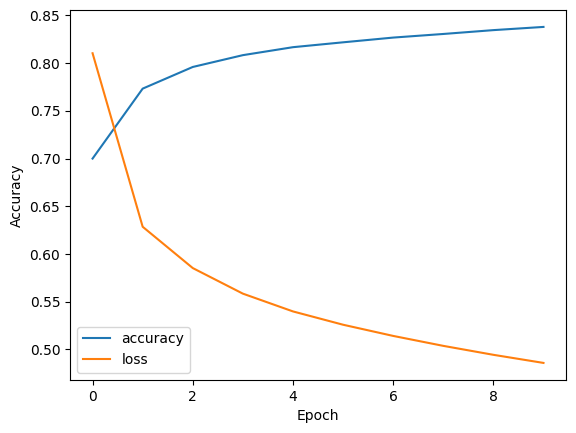

In [ ]:
plt.plot(train_accuracy, label='accuracy')
plt.plot(train_loss, label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

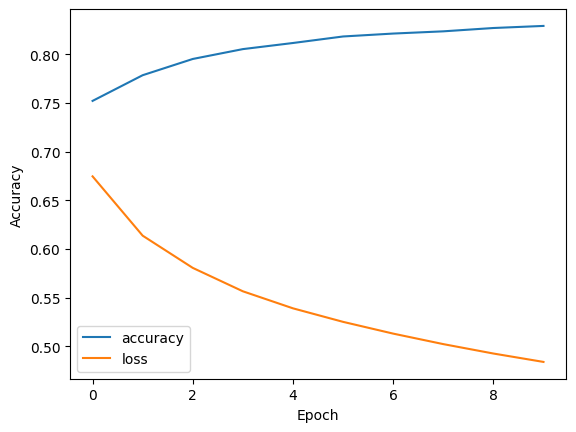

In [ ]:
plt.plot(test_accuracy, label='accuracy')
plt.plot(test_loss, label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()